# メモ Todo 
## 下がる、下がらないのベルーヌーイ分布で確率をだす。
## poisson分布

# フロー
1. 変数の定義
1. 過去のCSVファイルからデータをロードする
1. 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）
1. CSVロードして、並び替え、必要な日付からにする
1. 前処理部分(現在の値と、過去のからの上昇率、下降率を記したDFを作成)
1. 前処理データの保存

# 変数の定義


In [16]:
# 変数の定義
import pandas as pd
import pandas_profiling as pdp

pram_predict_day=1                   # 1日後の予測をする
#pram_predict_plus_percent=0.70            # 70%で上昇率、下降の設定
#pram_predict_minus_percent=0.20           # 40%で上昇率、下降の設定
pram_predict_plus_percent=0.40             # 40%で上昇率、下降の設定
pram_predict_minus_percent=0.40            # 40%で上昇率、下降の設定
pd.set_option('display.max_columns', 100)


YEAR=""
start_date='2000-01-29'             #元データを2000年からにする

# 過去のCSVファイルからデータをロードする


In [17]:
# 過去のCSVファイルからデータをロードする

class load_csv:
    #CSVは右記サイトのからダウンロード https://stooq.com/q/d/?s=zarjpy
    import pandas as pd
    
    def load(self):
        #df_fx=pd.read_csv('data/zarjpy_d.csv')
        df_fx=pd.read_csv('data/stock.csv')
        
        #df.to_csv('data/stock.csv',index=False)
        df_fx=df_fx.ix[:,['Date','Open','Close',"dow_compare"]]
        
        print ("配列長さ:",len(df_fx))
        return df_fx

# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


In [18]:
# 偏差値
def Deviation_value(df_tmp,x):
    std=df_tmp.std()['Open']

    mean=df_tmp.mean()['Open']
    deviation=(mean-x)*10/std+50

    return deviation


In [19]:
# 前処理モジュールの定義（当日の上昇率、過去からの上昇率、下降率）


def result(day0,xday):          #day0 当日の上昇率(close/open)の結果を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)): 
        rate= ((df_fx.iloc[i,close_index]/df_fx.iloc[i,open_index])-1)*100
    return rate

def persent(day0,xday):         #　当日のopen価格と、過去のと比較して上昇率(当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate <0:
            rate=0
        #rate=np.log10(rate)
    return rate

def persent_minus(day0,xday):   #　当日のopen価格と、過去のと比較して下降率(-当日open/過去open)を返す
    rate=0  #上昇率
    if ((i-xday)>=0 and data_len>(i-xday)):        
        rate= ((df_fx.iloc[i,open_index]/df_fx.iloc[i-xday,open_index])-1)*100
        if rate>0:
            rate=0
        #rate=np.log10(rate)
    return rate

# CSVロードして、並び替え、必要な日付からにする


In [20]:
LOAD_CSV=load_csv()
df_fx=LOAD_CSV.load()
#df_fx=df_fx.sort_values(by='Date')

df_fx=df_fx[(df_fx['Date']>=start_date )]
df_fx = df_fx.reset_index(drop=True)
data_len=len(df_fx)

df_fx.tail(10)
df_fx.info()

配列長さ: 4826
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 4 columns):
Date           4809 non-null object
Open           4809 non-null float64
Close          4809 non-null float64
dow_compare    4809 non-null float64
dtypes: float64(3), object(1)
memory usage: 150.4+ KB


/Users/fujiccofujimoto/.pyenv/versions/Anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [21]:
df=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df = pd.DataFrame(index=['Date'], columns=[
"Date" ,"Close","Open",
"day+1" ,"day+2" ,"day+3",
"day+4" ,"day+5" ,"day+6",
"day+7" ,"day+8" ,"day+9",
"day+10","day+11","day+12",
"day+13","day+14","day+15",
"day+16","day+17","day+18",
"day+19","day+20","day+21",
"day+22","day+23","day+24",
"day+25","day+26","day+27",
"day+28","day+29","day+30",

"day-1" ,"day-2" ,"day-3",
"day-4" ,"day-5" ,"day-6",
"day-7" ,"day-8" ,"day-9",
"day-10","day-11","day-12",
"day-13","day-14","day-15",
"day-16","day-17","day-18",
"day-19","day-20","day-21",
"day-22","day-23","day-24",
"day-25","day-26","day-27",
"day-28","day-29","day-30",
    
"std-30","std-60","std-90",
    
"dow_compare",
"label_up","label_none","label_down",
#"label2_up","label2_down"
])

In [22]:
date_index=  df_fx.columns.get_loc('Date')
close_index= df_fx.columns.get_loc('Close')
open_index=  df_fx.columns.get_loc('Open')

dow_compare_index=df_fx.columns.get_loc('dow_compare')


df_fx.head(8)

,Date,Open,Close,dow_compare
0,2000-01-31,19375.109375,19539.699219,1.019073
1,2000-02-01,19536.679688,19423.380859,1.009445
2,2000-02-02,19522.330078,19578.910156,0.996880
3,2000-02-03,19648.349609,19786.419922,1.000269
4,2000-02-04,19866.189453,19763.130859,0.995409
5,2000-02-07,19832.759766,19945.429688,0.994512
6,2000-02-08,19955.300781,19868.880859,1.004892
7,2000-02-09,19930.410156,20007.769531,0.977198


# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成）



In [23]:
# 前処理部分　（現在の値と、過去のからの上昇率、下降率を記したDFを作成
for i in range(data_len) :
    Date_day=df_fx.iloc[i,date_index ]

    if i%100==0:
        print('{0:.1%}'.format(i/data_len),end=" ")

    #当日のOPENの株価
    day0         =df_fx.iloc[i,open_index]
    day0_open    =df_fx.iloc[i,open_index] 
    day0_close   =df_fx.iloc[i,close_index] 
    day0_dow_compare  =df_fx.iloc[i,dow_compare_index] 

    #その後の結果から正解ラベルを作成
    label_up=0     #上昇
    label_none=0   #変化少ない
    label_down=0   #下降

    #正解データの計算  (pram_predict_day) 日後に、(pram_predict_persent)％の前後がある
    prediction=result(day0_open,pram_predict_day)    

    # ３つのらべるの場合
    if prediction>=      pram_predict_plus_percent:
        label_up  =1        #上昇
        label_none=0        #そのまま
        label_down=0        #下降
    elif prediction<=   -pram_predict_minus_percent:
        label_up  =0        #上昇
        label_none=0        #そのまま
        label_down=1        #下降
    else:
        
        label_up  =0        #上昇
        label_none=1        #そのまま
        label_down=0        #下降
    
    Deviation30=Deviation_value(df.tail(30),day0_open)
    Deviation60=Deviation_value(df.tail(60),day0_open)
    Deviation90=Deviation_value(df.tail(90),day0_open)
    
    series=pd.Series([Date_day,day0_close,day0_open,
                      persent(day0,1),persent(day0,2),persent(day0,3),
                      persent(day0,4),persent(day0,5),persent(day0,6),
                      persent(day0,7),persent(day0,8),persent(day0,9),
                      persent(day0,10),persent(day0,11),persent(day0,12),
                      persent(day0,13),persent(day0,14),persent(day0,15),
                      persent(day0,16),persent(day0,17),persent(day0,18),
                      persent(day0,19),persent(day0,20),persent(day0,21),
                      persent(day0,22),persent(day0,23),persent(day0,24),
                      persent(day0,25),persent(day0,26),persent(day0,27),
                      persent(day0,28),persent(day0,29),persent(day0,30),

                      persent_minus(day0,1),persent_minus(day0,2),persent_minus(day0,3),
                      persent_minus(day0,4),persent_minus(day0,5),persent_minus(day0,6),
                      persent_minus(day0,7),persent_minus(day0,8),persent_minus(day0,9),
                      persent_minus(day0,10),persent_minus(day0,11),persent_minus(day0,12),
                      persent_minus(day0,13),persent_minus(day0,14),persent_minus(day0,15),
                      persent_minus(day0,16),persent_minus(day0,17),persent_minus(day0,18),
                      persent_minus(day0,19),persent_minus(day0,20),persent_minus(day0,21),
                      persent_minus(day0,22),persent_minus(day0,23),persent_minus(day0,24),
                      persent_minus(day0,25),persent_minus(day0,26),persent_minus(day0,27),
                      persent_minus(day0,28),persent_minus(day0,29),persent_minus(day0,30),
                      
                      Deviation30,Deviation60,Deviation90,
                      day0_dow_compare,
                      label_up,label_none,label_down,
                     ]
                      ,index=df.columns)
    series.append
    df=df.append(series,ignore_index = True)

0.0% 2.1% 4.2% 6.2% 8.3% 10.4% 12.5% 14.6% 16.6% 18.7% 20.8% 22.9% 25.0% 27.0% 29.1% 31.2% 33.3% 35.4% 37.4% 39.5% 41.6% 43.7% 45.7% 47.8% 49.9% 52.0% 54.1% 56.1% 58.2% 60.3% 62.4% 64.5% 66.5% 68.6% 70.7% 72.8% 74.9% 76.9% 79.0% 81.1% 83.2% 85.3% 87.3% 89.4% 91.5% 93.6% 95.7% 97.7% 99.8% 

## 移動平均の追加

In [31]:
df['rolling_up5']=df["label_up"].rolling(window=5).mean()
df['rolling_down5']=df["label_down"].rolling(window=5).mean()
df['label_none5']=df["label_none"].rolling(window=5).mean()

df['rolling_up10']=df["label_up"].rolling(window=10).mean()
df['rolling_down10']=df["label_down"].rolling(window=10).mean()
df['label_none10']=df["label_none"].rolling(window=10).mean()

In [32]:
df['restult']=df['Close']/df['Open']

# 前処理データの保存

In [33]:
df.to_csv('data/stock_preprocessing.csv',index=False)

In [34]:
#df=pd.read_csv('data/fx_preprocessing.csv')
#df

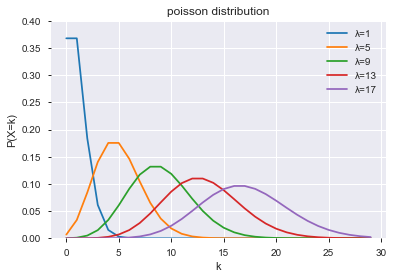

In [35]:
import numpy as np,matplotlib.pyplot as plt,math
# lam= 一定時間のくる確率 / k  = 一定時間
for lam in range(1,21,4):
    plt.ylim((0,0.4))
    po,x=[],[]    
    for k in range(0,30,1):
        po.append(np.exp(-lam)*lam**k/math.factorial(k))     
        x.append(k)
    plt.plot(x,po,label="λ={}".format(lam))
plt.xlabel("k")
plt.legend(loc="best")    #凡例を表示
plt.ylabel("P(X=k)")
plt.title("poisson distribution")
plt.show()

In [36]:
df["label_none"].rolling(window=30).mean()


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4805    0.366667
4806    0.400000
4807    0.400000
4808    0.400000
4809    0.400000
Name: label_none, Length: 4810, dtype: float64

In [37]:
#df["label_up"].rolling(window=30).mean()

#df["label_down"].rolling(window=30).mean()
lam=df["label_none"].rolling(window=30).mean()

po=np.exp(-lam)*lam